In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('data.csv')

In [16]:

breast_cancer = load_breast_cancer()

df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

df['diagnosis'] = breast_cancer.target

df['diagnosis'] = df['diagnosis'].map({0: 'M', 1: 'B'})

print(df.head())

print(df.isnull().sum())

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [17]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

print("Missing Values Before Handling:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

z_scores = zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nMissing Values After Handling:")
print(df.isnull().sum())
print("\n Outliers After Handling:")
print((df[numerical_cols] < -3).sum() + (df[numerical_cols] > 3).sum())


Missing Values Before Handling:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

Missing Values After Handling:
mean radius             

In [19]:
print(df.columns)


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')


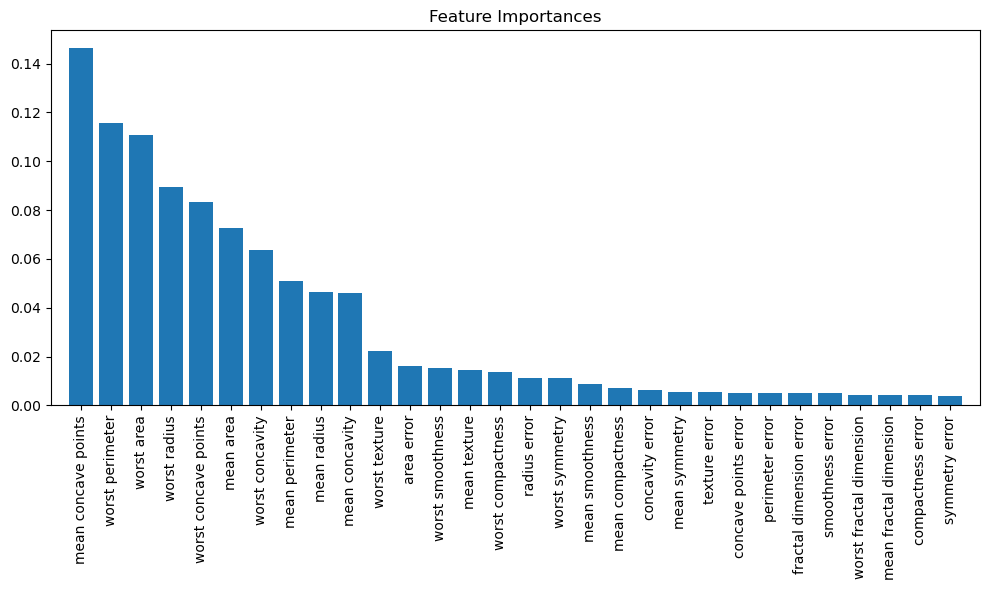

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [21]:
non_numeric_cols = df.select_dtypes(exclude='number').columns
print("Columns with non-numeric data type:", non_numeric_cols)

for col in non_numeric_cols:
    print(f"Unique values in {col}: {df[col].unique()}")


Columns with non-numeric data type: Index(['diagnosis'], dtype='object')
Unique values in diagnosis: ['M' 'B']


In [22]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    'radius_mean': [20, 15, 25, None], 
    'texture_mean': [12, 10, 14, 13],
    'area_mean': [500, 300, 600, 550],  
    'perimeter_mean': [100, 80, 110, 105],  
    'smoothness_mean': [0.1, 0.08, 0.12, 0.11], 
    'compactness_mean': [0.15, 0.1, 0.2, 0.18],  
    'diagnosis': ['M', 'B', 'M', 'M']
})

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


feature_means = df.mean()

df.fillna(feature_means, inplace=True)

rf = RandomForestClassifier()
rf.fit(df.drop('diagnosis', axis=1), df['diagnosis'])
print("Feature Means:")
print(feature_means)
print("\nRandom Forest Classifier Trained Successfully!")

Feature Means:
radius_mean          20.0000
texture_mean         12.2500
area_mean           487.5000
perimeter_mean       98.7500
smoothness_mean       0.1025
compactness_mean      0.1575
diagnosis             0.7500
dtype: float64

Random Forest Classifier Trained Successfully!


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop(['id', 'diagnosis'], axis=1)  
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['area_perimeter_interaction'] = X_train['area_mean'] * X_train['perimeter_mean']
X_test['area_perimeter_interaction'] = X_test['area_mean'] * X_test['perimeter_mean']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


In [25]:
from sklearn.preprocessing import PolynomialFeatures


df = pd.DataFrame({
    'radius_mean': [20, 15, 25],
    'texture_mean': [12, 10, 14],
    'area_mean': [500, 300, 600],
    'perimeter_mean': [100, 80, 110],
    'smoothness_mean': [0.1, 0.08, 0.12],
    'compactness_mean': [0.15, 0.1, 0.2],
    'diagnosis': ['M', 'B', 'M']
})

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


df['radius_texture_interaction'] = df['radius_mean'] * df['texture_mean']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['radius_mean', 'texture_mean']])

original_feature_names = ['radius_mean', 'texture_mean']
poly_feature_names = []
for feature_combinations in poly.powers_:
    poly_feature_name = '*'.join([f'{original_feature_names[i]}^{power}' if power > 1 else original_feature_names[i] for i, power in enumerate(feature_combinations) if power != 0])
    poly_feature_names.append(poly_feature_name)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, poly_df], axis=1)

rf = RandomForestClassifier()
rf.fit(df.drop('diagnosis', axis=1), df['diagnosis'])
feature_importances = rf.feature_importances_
selected_features = df.columns[:-1][feature_importances > 0.1]  

print("Modified DataFrame:")
print(df.head())

print("\nSelected Features:")
print(selected_features)


Modified DataFrame:
   radius_mean  texture_mean  area_mean  perimeter_mean  smoothness_mean  \
0           20            12        500             100             0.10   
1           15            10        300              80             0.08   
2           25            14        600             110             0.12   

   compactness_mean  diagnosis  radius_texture_interaction  radius_mean  \
0              0.15          1                         240         20.0   
1              0.10          0                         150         15.0   
2              0.20          1                         350         25.0   

   texture_mean  radius_mean^2  radius_mean*texture_mean  texture_mean^2  
0          12.0          400.0                     240.0           144.0  
1          10.0          225.0                     150.0           100.0  
2          14.0          625.0                     350.0           196.0  

Selected Features:
Index(['radius_mean', 'texture_mean', 'perimeter_mean'

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

df = pd.DataFrame({
    'radius_mean': [20, 15, 25, 18, 22],
    'texture_mean': [12, 10, 14, 13, 11],
    'area_mean': [500, 300, 600, 450, 550],
    'perimeter_mean': [100, 80, 110, 95, 105],
    'smoothness_mean': [0.1, 0.08, 0.12, 0.11, 0.09],
    'compactness_mean': [0.15, 0.1, 0.2, 0.18, 0.17],
    'diagnosis': ['M', 'B', 'M', 'B', 'M']
})

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

